In [1]:
import matplotlib.pyplot as plt

**!!! данные взяты из output-а IntergalValueTask.cpp**

In [2]:
thread_count = [2, 4, 8, 16]
element_count = [100000, 1000000, 10000000, 100000000]

In [5]:
atomic_data ={2:[0.006,0.06,0.613,5.736],4:[0.007,0.073,0.834,8.486],8:[0.01,0.101,1.064,10.534],16:[0.01,0.105,1.048,11.023]};
reduction_data ={2:[0.003,0.035,0.342,3.086],4:[0.002,0.017,0.196,1.743],8:[0.002,0.009,0.146,1.332],16:[0.002,0.008,0.079,0.843]};
consistent_data ={2:[0.006,0.066,0.599,6.161],4:[0.007,0.063,0.609,5.871],8:[0.006,0.063,0.589,5.889],16:[0.005,0.061,0.567,5.716]};
critical_data ={2:[0.018,0.125,1.224,12.039],4:[0.012,0.13,1.276,11.165],8:[0.01,0.146,1.384,14.336],16:[0.014,0.162,1.447,15.407]};

***Визуализация времени работы программы к размерности программы:***

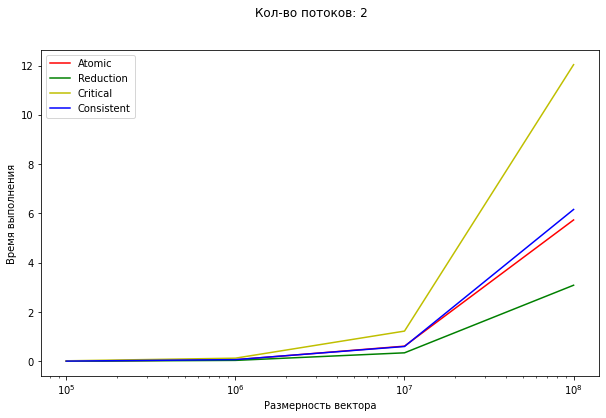

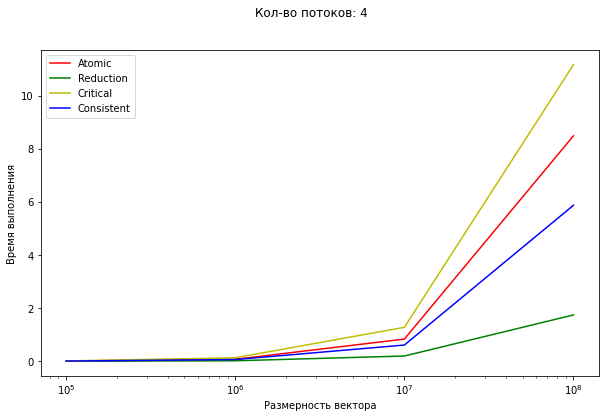

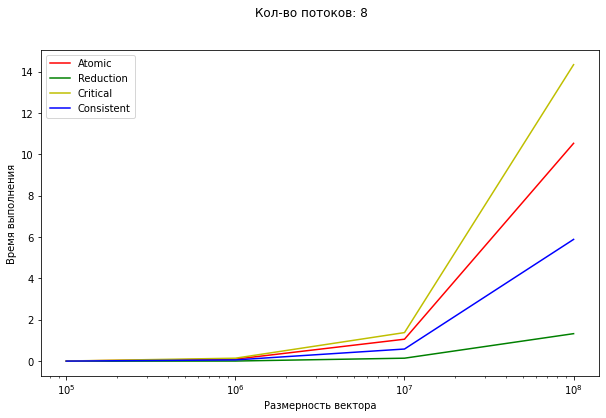

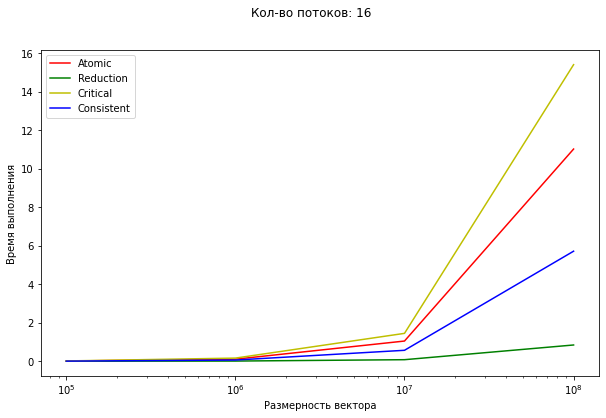

In [6]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, atomic_data[thread_count[i]], label = "Atomic", color='r')
    ax1.plot(element_count, reduction_data[thread_count[i]], label = "Reduction", color='g')
    ax1.plot(element_count, critical_data[thread_count[i]], label = "Critical", color='y')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

Как и ожидалось, reduce работает гораздо лучше на больших объемах данных. Атомик и критическая секция стабильно показывают, что они медленные на больших объемах вне зависимости от кол-ва потоков, даже при сравнении с последовательным выполнением без использования многопоточности

Однако при сравнительно небольших объемах (при размерности <= 10^5) - не важно, что использовать, как показывает статистика.

***Визуализация времени работы программы к кол-ву потоков:***

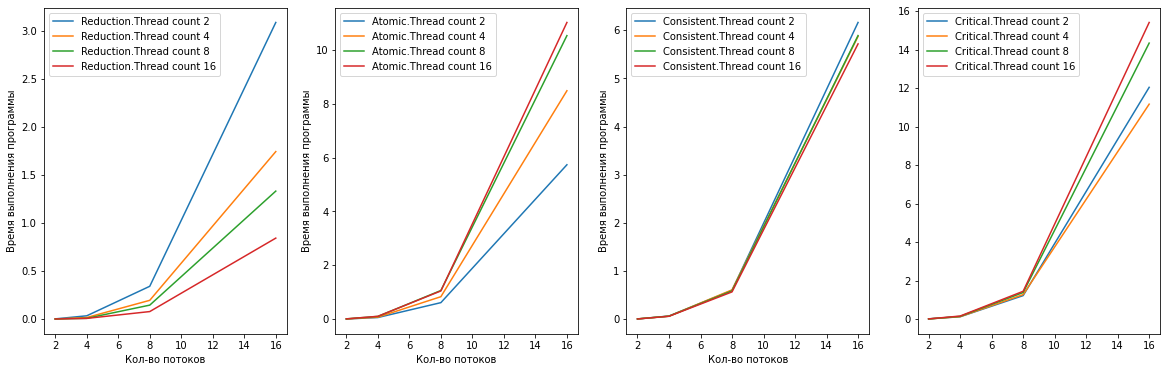

In [13]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')
ax2.set_xlabel('Кол-во потоков')
ax2.set_ylabel('Время выполнения программы')
ax3.set_xlabel('Кол-во потоков')
ax3.set_ylabel('Время выполнения программы')

for i in range(len(reduction_data)):
    ax1.plot(thread_count, reduction_data[thread_count[i]], label = 'Reduction.Thread count ' + str(thread_count[i]))
    ax2.plot(thread_count, atomic_data[thread_count[i]], label = 'Atomic.Thread count ' + str(thread_count[i]))
    ax3.plot(thread_count, consistent_data[thread_count[i]], label = 'Consistent.Thread count ' + str(thread_count[i]))
    ax4.plot(thread_count, critical_data[thread_count[i]], label = 'Critical.Thread count ' + str(thread_count[i]))


    
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

Здесь мы можем видеть, как кол-во потоков влияет на обработку данных. Reduce с увелечением кол-ва потоков стремительно уменьшает время выполнения программы. Особенно, в случае мигрорования с однопоточного приложения.
Однако, с определенного момента, кол-во потоков перестаев влиять на время исполнения, что тоже очевидно (потоки начинают простаивать)


В случае Атомика и критической секции видно, что кол-во потоков играет роль отрицательную - блокировки сильно увеличивают время работы (что собственно и ожидаемо).

**Визуализация ускорения работы программы:**

In [11]:
speed_up_atomic = {k: [ b/ (b / (m + 0.0000000001) + 0.0000000001) for b,m in zip(consistent_data[k], atomic_data[k])] for k in consistent_data if k in atomic_data}
speed_up_reduce = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], reduction_data[k])] for k in consistent_data if k in reduction_data}
speed_up_critical = {k: [ b/ (b / (m +0.0000000001) + 0.0000000001) for b, m in zip(consistent_data[k], critical_data[k])] for k in consistent_data if k in critical_data}

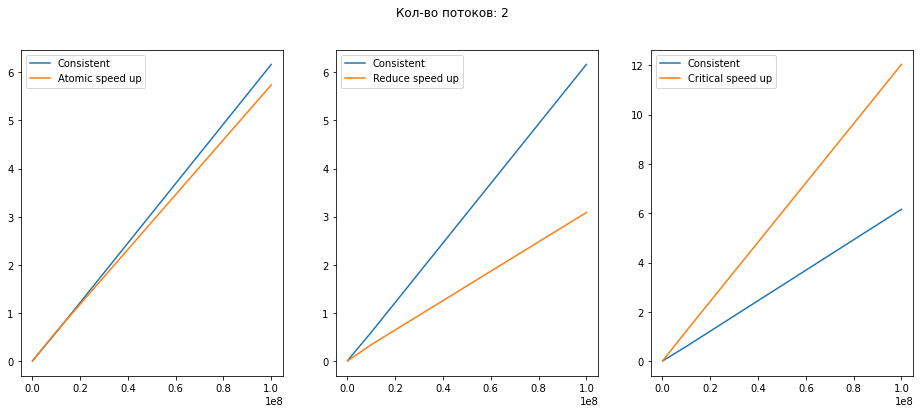

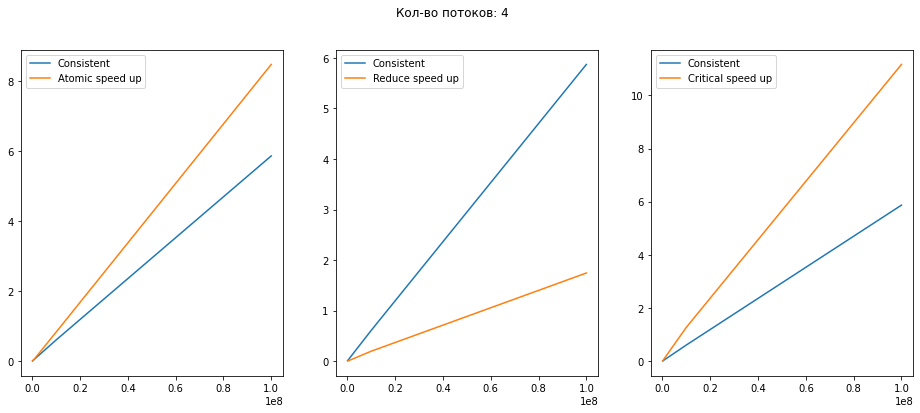

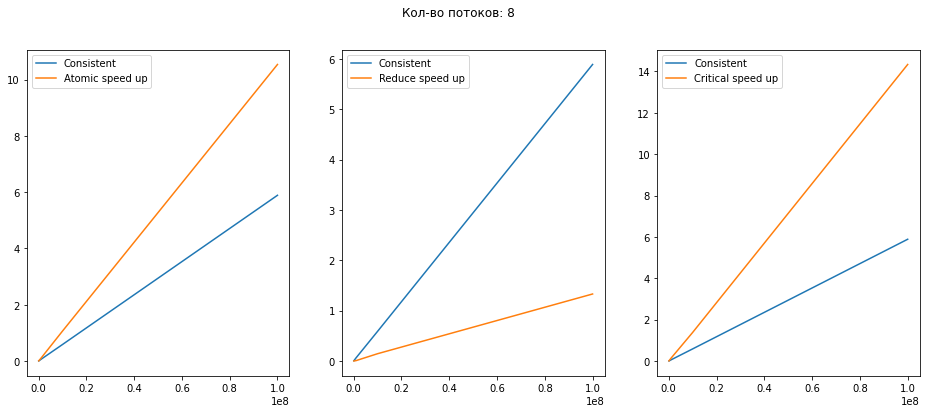

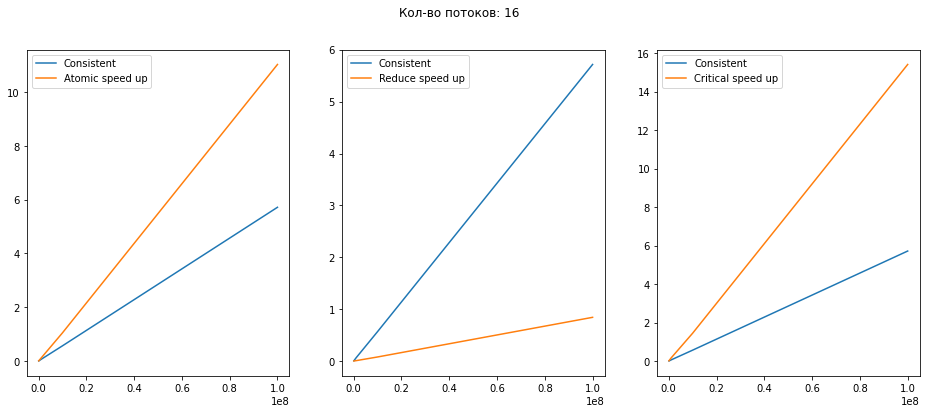

In [12]:
for i in range (len(element_count)):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))

    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, speed_up_atomic[thread_count[i]], label = "Atomic speed up")
    
    ax2.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax2.plot(element_count, speed_up_reduce[thread_count[i]], label = "Reduce speed up")
    
    ax3.plot(element_count, consistent_data[thread_count[i]], label = "Consistent")
    ax3.plot(element_count, speed_up_critical[thread_count[i]], label = "Critical speed up")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()